# Import Dataset, drop 0 columns

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


def clean_csv_files(folder_path):
  cleaned_dataframes = {}

  # List of columns to drop
  columns_to_drop = [
      "status", "start_date", "end_date", "window_start_date", "window_end_date",
      "emails", "devs", "emails_thread_starter", "emails_thread_starter_word_count",
      "emails_thread_starter_characters", "emails_threads", "emails_threads_word_count",
      "emails_threads_characters", "emails_no_replies", "emails_no_replies_word_count",
      "emails_no_replies_characters", "emails_jira", "most_complex_unit_loc",
      "most_complex_unit_mcabe_index", "total_number_of_files", "number_of_files_main",
      "lines_of_code_main", "number_of_files_test", "lines_of_code_test",
      "test_vs_main_lines_of_code_percentage", "number_of_files_generated",
      "lines_of_code_generated", "number_of_files_build_and_deployment",
      "lines_of_code_build_and_deployment", "negligible_risk_file_size_count",
      "low_risk_file_size_count", "medium_risk_file_size_count", "high_risk_file_size_count",
      "very_high_risk_file_size_count", "negligible_risk_file_size_loc", "low_risk_file_size_loc",
      "medium_risk_file_size_loc", "high_risk_file_size_loc", "very_high_risk_file_size_loc",
      "number_of_units", "lines_of_code_in_units", "lines_of_code_outside_units",
      "unit_size_negligible_risk_loc", "unit_size_negligible_risk_count", "unit_size_low_risk_loc",
      "unit_size_low_risk_count", "unit_size_medium_risk_loc", "unit_size_medium_risk_count",
      "unit_size_high_risk_loc", "unit_size_high_risk_count", "unit_size_very_high_risk_loc",
      "unit_size_very_high_risk_count", "conditional_complexity_negligible_risk_loc",
      "conditional_complexity_negligible_risk_count", "conditional_complexity_low_risk_loc",
      "conditional_complexity_low_risk_count", "conditional_complexity_medium_risk_loc",
      "conditional_complexity_medium_risk_count", "conditional_complexity_high_risk_loc",
      "conditional_complexity_high_risk_count", "conditional_complexity_very_high_risk_loc",
      "conditional_complexity_very_high_risk_count", "conditional_complexity_high_plus_risk_count",
      "conditional_complexity_high_plus_risk_loc", "number_of_contributors",
      "duplication_number_of_duplicates", "duplication_number_of_files_with_duplicates",
      "duplication_number_of_duplicated_lines", "duplication_percentage", "unit_duplicates_count", "releases"
  ]

  for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
      file_path = os.path.join(folder_path, filename)

      # Load CSV file
      df = pd.read_csv(file_path)

      # Drop specified columns
      df = df.drop(
          columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

      key = os.path.splitext(filename)[0]
      cleaned_dataframes[key] = df

  return cleaned_dataframes

folder_path = "scraper-output"
cleaned_data = clean_csv_files(folder_path)


# Clean data

In [2]:
import pandas as pd
import numpy as np

for key, df in cleaned_data.items():
    # Replace NaN values in numerical columns with 0
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col] = df[col].fillna(0)

    # Replace NaN and blank/empty values in 'programming_lang' column with the mode
    if 'programming_lang' in df.columns:
        # Calculate mode value
        mode_value = df['programming_lang'].mode()[0] if not df['programming_lang'].mode().empty else 'Unknown'
        
        # Replace NaN values with the mode
        df['programming_lang'] = df['programming_lang'].fillna(mode_value)
        
        # Replace blank or whitespace-only values with the mode
        df['programming_lang'] = df['programming_lang'].replace(r'^\s*$', mode_value, regex=True)

In [3]:
status_data = pd.read_csv("project-status.csv")
status_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   project  154 non-null    object
 1   status   154 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [4]:
# Filter out projects with fewer than 10 data points
cleaned_data = {project: df for project,
                df in cleaned_data.items() if len(df) >= 10}

def merge_status(cleaned_data, status_data):
  status_dict = status_data.set_index('project')['status'].to_dict()
  for project, df in cleaned_data.items():
    df['status'] = status_dict.get(project, 'Unknown')
  return cleaned_data

cleaned_data = merge_status(cleaned_data, status_data)


# Base case classification (condensing each project data to a single column)


Training Logistic Regression...


/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test Classification Report for Logistic Regression:
               precision    recall  f1-score   support

   Graduated       0.72      0.76      0.74        17
     Retired       0.69      0.64      0.67        14

    accuracy                           0.71        31
   macro avg       0.71      0.70      0.70        31
weighted avg       0.71      0.71      0.71        31

Top 5 important features for Logistic Regression: ['major_contributors_std' 'files_renamed_std' 'active_days_std'
 'committers_trend' 'major_contributors_trend']


/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


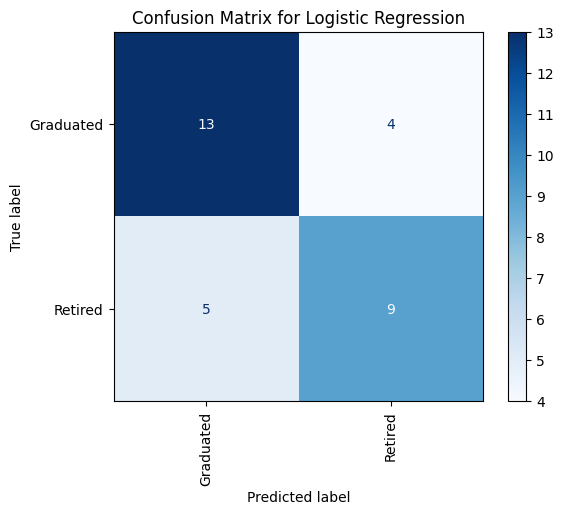


Training SVM...
Test Classification Report for SVM:
               precision    recall  f1-score   support

   Graduated       0.79      0.65      0.71        17
     Retired       0.65      0.79      0.71        14

    accuracy                           0.71        31
   macro avg       0.72      0.72      0.71        31
weighted avg       0.72      0.71      0.71        31

Top 5 important features for SVM: ['blanks_mean' 'directories_trend' 'programming_lang_PHP' 'commits_trend'
 'active_days_std']


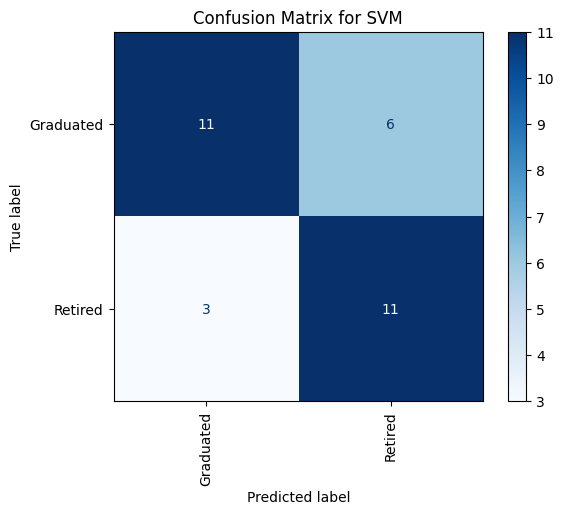


Training Decision Tree...
Test Classification Report for Decision Tree:
               precision    recall  f1-score   support

   Graduated       0.62      0.59      0.61        17
     Retired       0.53      0.57      0.55        14

    accuracy                           0.58        31
   macro avg       0.58      0.58      0.58        31
weighted avg       0.58      0.58      0.58        31

Decision Tree does not have coefficients to display.


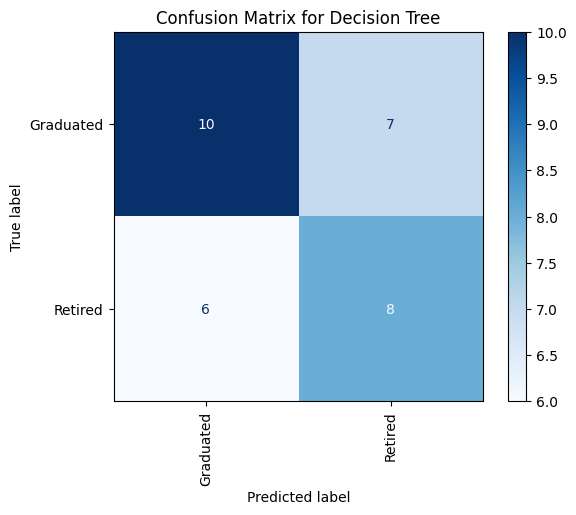


Training Random Forest...
Test Classification Report for Random Forest:
               precision    recall  f1-score   support

   Graduated       0.70      0.82      0.76        17
     Retired       0.73      0.57      0.64        14

    accuracy                           0.71        31
   macro avg       0.71      0.70      0.70        31
weighted avg       0.71      0.71      0.70        31

Random Forest does not have coefficients to display.


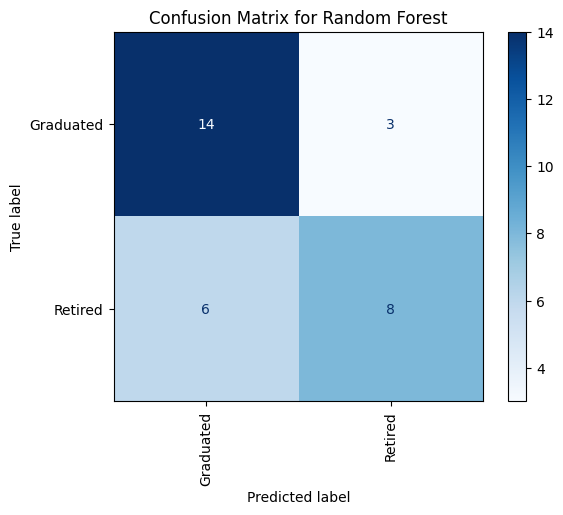


Training k-NN...
Test Classification Report for k-NN:
               precision    recall  f1-score   support

   Graduated       0.67      0.82      0.74        17
     Retired       0.70      0.50      0.58        14

    accuracy                           0.68        31
   macro avg       0.68      0.66      0.66        31
weighted avg       0.68      0.68      0.67        31

k-NN does not have coefficients to display.


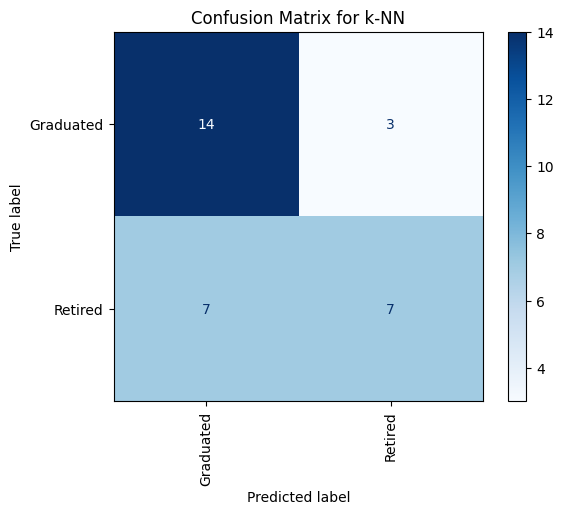


Training Naive Bayes...
Test Classification Report for Naive Bayes:
               precision    recall  f1-score   support

   Graduated       0.77      0.59      0.67        17
     Retired       0.61      0.79      0.69        14

    accuracy                           0.68        31
   macro avg       0.69      0.69      0.68        31
weighted avg       0.70      0.68      0.68        31

Naive Bayes does not have coefficients to display.


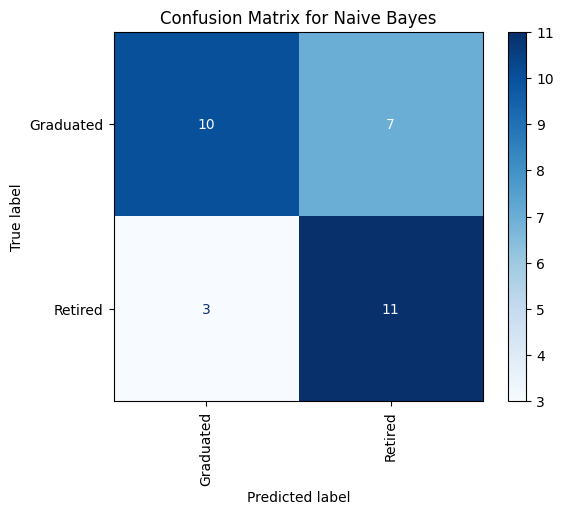

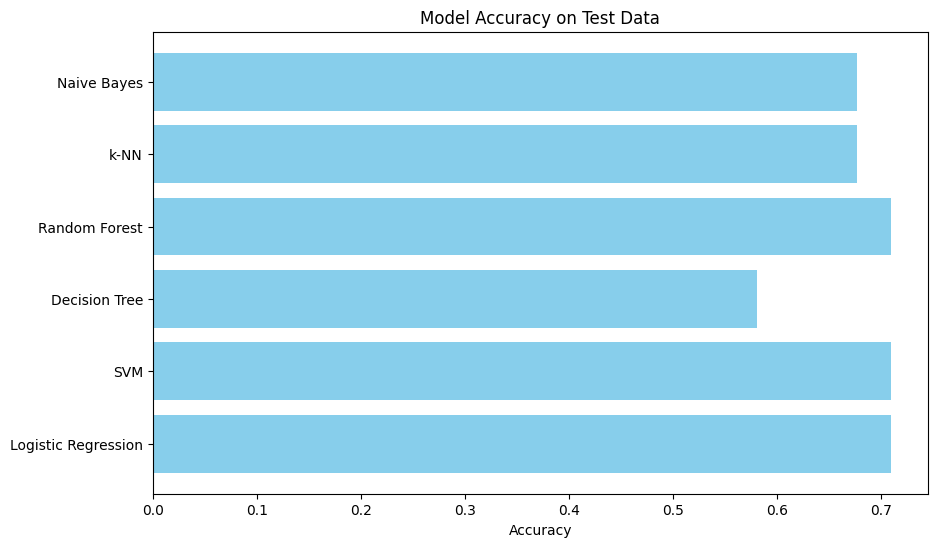

In [5]:
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)
pd.options.mode.chained_assignment = None  # Suppress warnings

# Function to compute mean, std, and trend for each numerical feature
def extract_features(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    numerical_features.remove("measurement_month")  
    
    feature_dict = {}
    for feature in numerical_features:
        values = df[["measurement_month", feature]].dropna()
        
        feature_dict[f"{feature}_mean"] = values[feature].mean()
        feature_dict[f"{feature}_std"] = values[feature].std()
        
        if len(values) > 1:
            slope, _ = np.polyfit(values["measurement_month"], values[feature], 1)
        else:
            slope = 0  # Default to 0 if insufficient data
        
        feature_dict[f"{feature}_trend"] = slope
    
    feature_dict["programming_lang"] = df["programming_lang"].mode()[0]  # Most common language
    
    return feature_dict

# Extract features for all projects
feature_list = []
for project, df in cleaned_data.items():
    features = extract_features(df)
    features["project"] = project
    feature_list.append(features)

features_df = pd.DataFrame(feature_list)

# Merge with status data
data = features_df.merge(status_data, on="project").drop(columns=["project"])

# Define categorical and numerical features
categorical_features = ["programming_lang"]
numerical_features = [col for col in data.columns if col not in ["status"] + categorical_features]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Train-validation-test split
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data["status"], random_state=42, shuffle=True)
train_data, val_data = train_test_split(train_data, test_size=0.125, stratify=train_data["status"], random_state=42, shuffle=True) 
# 0.125 of 80% = 10% of original data used for validation

X_train, y_train = train_data.drop(columns=["status"]), train_data["status"]
X_val, y_val = val_data.drop(columns=["status"]), val_data["status"]
X_test, y_test = test_data.drop(columns=["status"]), test_data["status"]

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegressionCV(
        cv=5,                    
        max_iter=1000,           
        random_state=42,
        n_jobs=-1,               
        penalty='l2',            
        solver='saga',           
        scoring='accuracy',     
        refit=True               
    ),
    "SVM": SVC(
        kernel='linear',        # Linear kernel for simplicity
        random_state=42, 
        max_iter=1000
    ),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42,
        max_depth=5,            # Limit depth to avoid overfitting
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, 
        random_state=42,
        n_jobs=-1
    ),
    "k-NN": KNeighborsClassifier(
        n_neighbors=5,
        n_jobs=-1
    ),
    "Naive Bayes": GaussianNB()
}

# Store accuracy results
model_accuracies = {}

# Train, evaluate, and display results for each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Create pipeline for each model
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Test evaluation
    y_test_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    model_accuracies[model_name] = accuracy

    print(f"Test Classification Report for {model_name}:\n", classification_report(y_test, y_test_pred))

    # Check if model has coefficients and print the top 5 important features
    if hasattr(model, "coef_"):
        # For models with coefficients (e.g., Logistic Regression, SVM)
        feature_importance = np.abs(model.coef_).flatten()
        
        # Get the feature names after preprocessing
        numerical_feature_names = numerical_features
        categorical_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
        
        # Combine both feature sets
        all_feature_names = np.concatenate([numerical_feature_names, categorical_feature_names])
        
        # Sort feature importance and get the top 5 features
        top_features_idx = np.argsort(feature_importance)[::-1][:5]  # Get indices of top 5 features
        top_feature_names = all_feature_names[top_features_idx]
        
        print(f"Top 5 important features for {model_name}: {top_feature_names}")
    else:
        print(f"{model_name} does not have coefficients to display.")

    # Confusion matrix
    display = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap='Blues', xticks_rotation='vertical')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Plot the accuracies for each model
plt.figure(figsize=(10, 6))
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy on Test Data')
plt.show()



Training Logistic Regression...
Test Classification Report for Logistic Regression:
               precision    recall  f1-score   support

   Graduated       0.76      0.76      0.76        17
     Retired       0.71      0.71      0.71        14

    accuracy                           0.74        31
   macro avg       0.74      0.74      0.74        31
weighted avg       0.74      0.74      0.74        31



/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


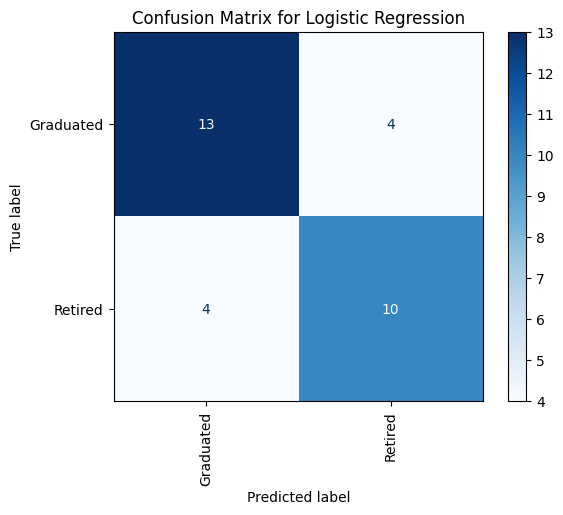


Training SVM...
Test Classification Report for SVM:
               precision    recall  f1-score   support

   Graduated       0.76      0.76      0.76        17
     Retired       0.71      0.71      0.71        14

    accuracy                           0.74        31
   macro avg       0.74      0.74      0.74        31
weighted avg       0.74      0.74      0.74        31



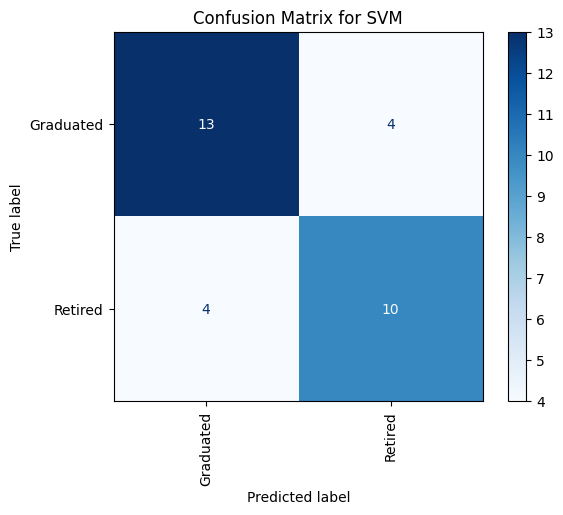


Training Decision Tree...
Test Classification Report for Decision Tree:
               precision    recall  f1-score   support

   Graduated       0.59      0.59      0.59        17
     Retired       0.50      0.50      0.50        14

    accuracy                           0.55        31
   macro avg       0.54      0.54      0.54        31
weighted avg       0.55      0.55      0.55        31



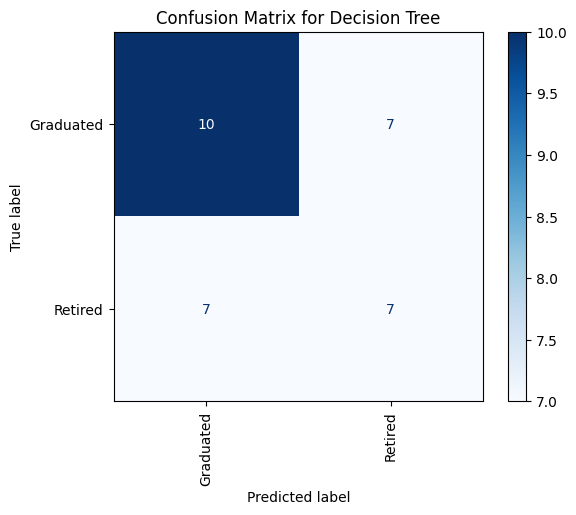


Training Random Forest...
Test Classification Report for Random Forest:
               precision    recall  f1-score   support

   Graduated       0.68      0.76      0.72        17
     Retired       0.67      0.57      0.62        14

    accuracy                           0.68        31
   macro avg       0.68      0.67      0.67        31
weighted avg       0.68      0.68      0.67        31



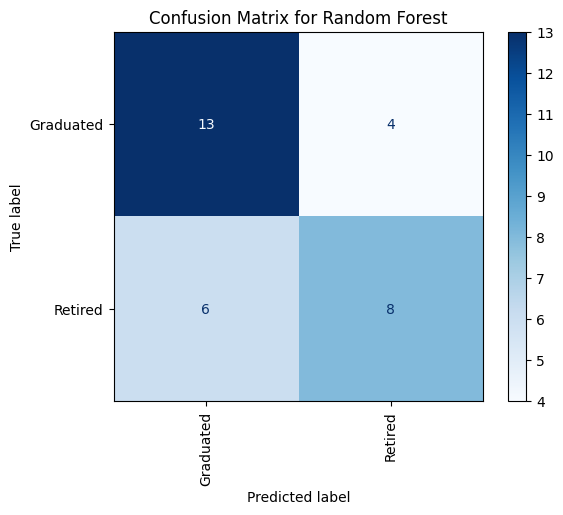


Training k-NN...
Test Classification Report for k-NN:
               precision    recall  f1-score   support

   Graduated       0.72      0.76      0.74        17
     Retired       0.69      0.64      0.67        14

    accuracy                           0.71        31
   macro avg       0.71      0.70      0.70        31
weighted avg       0.71      0.71      0.71        31



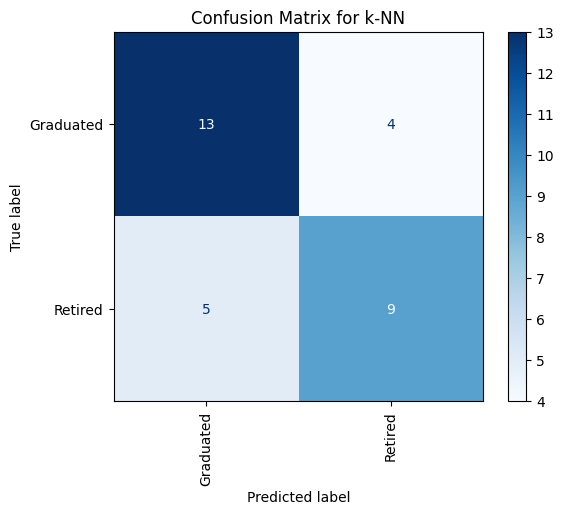


Training Naive Bayes...
Test Classification Report for Naive Bayes:
               precision    recall  f1-score   support

   Graduated       0.86      0.35      0.50        17
     Retired       0.54      0.93      0.68        14

    accuracy                           0.61        31
   macro avg       0.70      0.64      0.59        31
weighted avg       0.71      0.61      0.58        31



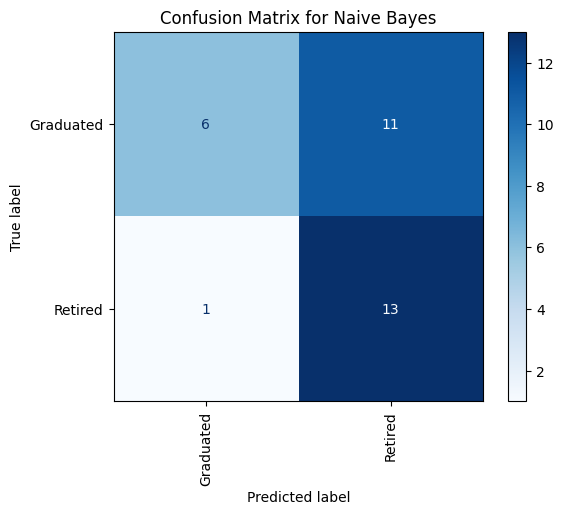

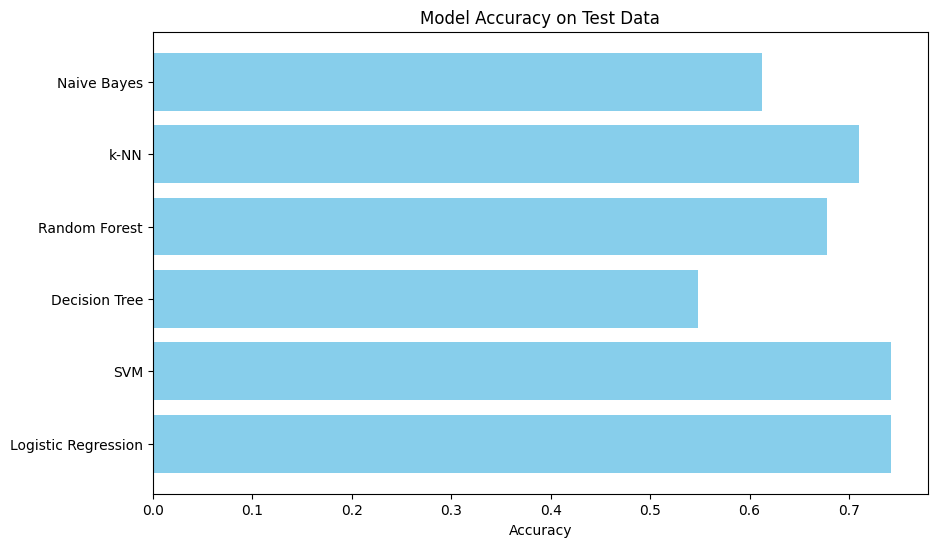

In [6]:
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)
pd.options.mode.chained_assignment = None  # Suppress warnings

# Function to compute mean, std, and trend for each numerical feature


def extract_features(df):
  numerical_features = ["commits",
                        "authors",
                        "committers",
                        "minor_contributors",
                        "major_contributors"]

  feature_dict = {}
  for feature in numerical_features:
    values = df[["measurement_month", feature]].dropna()

    feature_dict[f"{feature}_mean"] = values[feature].mean()
    feature_dict[f"{feature}_std"] = values[feature].std()

    if len(values) > 1:
      slope, _ = np.polyfit(values["measurement_month"], values[feature], 1)
    else:
      slope = 0  # Default to 0 if insufficient data

    feature_dict[f"{feature}_trend"] = slope

  return feature_dict


# Extract features for all projects
feature_list = []
for project, df in cleaned_data.items():
  features = extract_features(df)
  features["project"] = project
  feature_list.append(features)

features_df = pd.DataFrame(feature_list)

# Merge with status data
data = features_df.merge(status_data, on="project").drop(columns=["project"])

# Define categorical and numerical features
numerical_features = [col for col in data.columns if col not in ["status"]]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
])

# Train-validation-test split
train_data, test_data = train_test_split(
    data, test_size=0.2, stratify=data["status"], random_state=42, shuffle=True)
train_data, val_data = train_test_split(
    train_data, test_size=0.125, stratify=train_data["status"], random_state=42, shuffle=True)
# 0.125 of 80% = 10% of original data used for validation

X_train, y_train = train_data.drop(columns=["status"]), train_data["status"]
X_val, y_val = val_data.drop(columns=["status"]), val_data["status"]
X_test, y_test = test_data.drop(columns=["status"]), test_data["status"]

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegressionCV(
        cv=5,
        max_iter=1000,
        random_state=42,
        n_jobs=-1,
        penalty='l2',
        solver='saga',
        scoring='accuracy',
        refit=True
    ),
    "SVM": SVC(
        kernel='linear',        # Linear kernel for simplicity
        random_state=42,
        max_iter=1000
    ),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42,
        max_depth=5,            # Limit depth to avoid overfitting
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ),
    "k-NN": KNeighborsClassifier(
        n_neighbors=5,
        n_jobs=-1
    ),
    "Naive Bayes": GaussianNB()
}

# Store accuracy results
model_accuracies = {}

# Train, evaluate, and display results for each model
for model_name, model in models.items():
  print(f"\nTraining {model_name}...")

  # Create pipeline for each model
  pipeline = Pipeline([
      ("preprocessor", preprocessor),
      ("classifier", model)
  ])

  # Train model
  pipeline.fit(X_train, y_train)

  # Test evaluation
  y_test_pred = pipeline.predict(X_test)
  accuracy = accuracy_score(y_test, y_test_pred)
  model_accuracies[model_name] = accuracy

  print(f"Test Classification Report for {model_name}:\n", classification_report(
      y_test, y_test_pred))

  # Confusion matrix
  display = ConfusionMatrixDisplay.from_estimator(
      pipeline, X_test, y_test, cmap='Blues', xticks_rotation='vertical')
  plt.title(f"Confusion Matrix for {model_name}")
  plt.show()

# Plot the accuracies for each model
plt.figure(figsize=(10, 6))
plt.barh(list(model_accuracies.keys()), list(
    model_accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy on Test Data')
plt.show()

## Hyperparameter tuning for best performing models

/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-05 16:03:26,343] A new study created in memory with name: no-name-9731c9ae-8773-4ae2-ba11-1224d78facbe
/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/optuna/study/study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(
/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/pyth

Best SVM Hyperparameters: {'C': 0.19973971582153915, 'max_iter': 10000}
Best SVM Accuracy: 0.8
Best Logistic Regression Hyperparameters: {'C': 0.14774529634953906, 'max_iter': 5000}
Best Logistic Regression Accuracy: 0.8095238095238095
Final Test Accuracy for SVM: 0.7419
Best Hyperparameters for SVM: {'C': 0.19973971582153915, 'max_iter': 10000}
Final Model Classification Report for SVM:
              precision    recall  f1-score   support

   Graduated       0.76      0.76      0.76        17
     Retired       0.71      0.71      0.71        14

    accuracy                           0.74        31
   macro avg       0.74      0.74      0.74        31
weighted avg       0.74      0.74      0.74        31



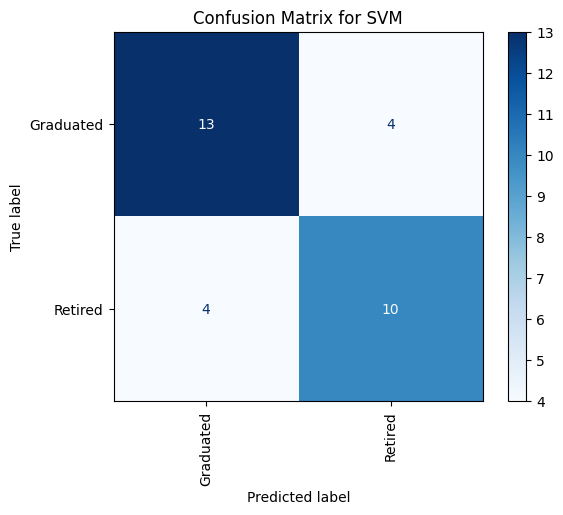

Final Test Accuracy for Logistic Regression: 0.7419
Best Hyperparameters for Logistic Regression: {'C': 0.14774529634953906, 'max_iter': 5000}
Final Model Classification Report for Logistic Regression:
              precision    recall  f1-score   support

   Graduated       0.76      0.76      0.76        17
     Retired       0.71      0.71      0.71        14

    accuracy                           0.74        31
   macro avg       0.74      0.74      0.74        31
weighted avg       0.74      0.74      0.74        31



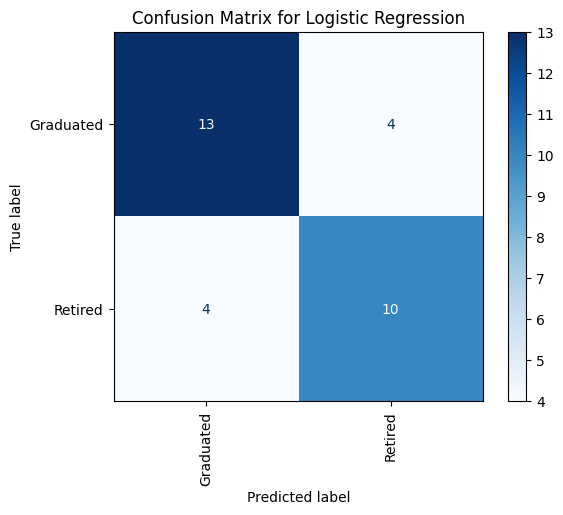

In [7]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline

# Define a fixed random seed for reproducibility
random_seed = 42

# Define objective function for SVC
def svc_objective(trial):
    C = trial.suggest_loguniform("C", 1e-3, 1e3)
    max_iter = trial.suggest_int("max_iter", 1000, 10000, step=1000)
    model = SVC(
        kernel='linear',
        C=C,
        max_iter=max_iter,
        random_state=random_seed
    )
    
    # Create pipeline
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    # Cross-validation to evaluate performance
    accuracy = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
    return accuracy

# Define objective function for LogisticRegressionCV
def lr_objective(trial):
    C = trial.suggest_loguniform("C", 1e-3, 1e3)
    max_iter = trial.suggest_int("max_iter", 1000, 10000, step=1000)
    model = LogisticRegressionCV(
        Cs=[C],
        cv=5,
        max_iter=max_iter,
        scoring='accuracy',
        random_state=random_seed,
        n_jobs=-1
    )
    
    # Create pipeline
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    # Cross-validation to evaluate performance
    accuracy = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
    return accuracy

# Optimize hyperparameters for each model with a fixed seed

svc_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=random_seed))
svc_study.optimize(svc_objective, n_trials=50, n_jobs=-1)

lr_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=random_seed))
lr_study.optimize(lr_objective, n_trials=50, n_jobs=-1)

# Display best parameters and accuracy for each model

print("Best SVM Hyperparameters:", svc_study.best_trial.params)
print("Best SVM Accuracy:", svc_study.best_value)

print("Best Logistic Regression Hyperparameters:", lr_study.best_trial.params)
print("Best Logistic Regression Accuracy:", lr_study.best_value)

# Evaluate each model using the best parameters
for model_name, study in [("SVM", svc_study), ("Logistic Regression", lr_study)]:
    best_params = study.best_trial.params
    
    # Handle model-specific hyperparameters
    if model_name == "SVM":
        best_model = SVC(
            kernel='linear',
            C=best_params["C"],
            max_iter=best_params["max_iter"],
            random_state=random_seed
        )
    else:  # Logistic Regression
        best_model = LogisticRegressionCV(
            Cs=[best_params["C"]],
            cv=5,
            max_iter=best_params["max_iter"],
            scoring='accuracy',
            random_state=random_seed,
            n_jobs=-1
        )

    # Final training on full dataset
    final_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", best_model)
    ])
    final_pipeline.fit(X_train, y_train)

    # Evaluate on test data
    y_test_pred = final_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Final Test Accuracy for {model_name}: {accuracy:.4f}")
    
    # Print the best hyperparameters for the model
    print(f"Best Hyperparameters for {model_name}: {best_params}")
    
    # Classification report
    print(f"Final Model Classification Report for {model_name}:")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    ConfusionMatrixDisplay.from_estimator(final_pipeline, X_test, y_test, cmap='Blues', xticks_rotation='vertical')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


# Removing mean and standard deviation and using different types of trends


Training Logistic Regression...
Test Classification Report for Logistic Regression:
               precision    recall  f1-score   support

   Graduated       0.89      0.47      0.62        17
     Retired       0.59      0.93      0.72        14

    accuracy                           0.68        31
   macro avg       0.74      0.70      0.67        31
weighted avg       0.75      0.68      0.66        31



/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shreyasshah/Desktop/UCD/SE/SE-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

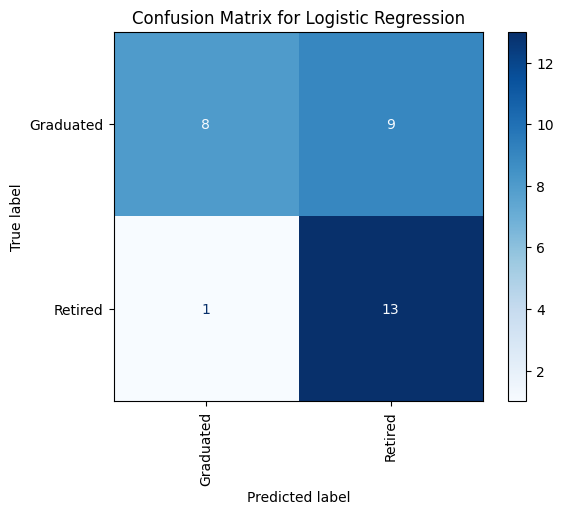


Training SVM...
Test Classification Report for SVM:
               precision    recall  f1-score   support

   Graduated       0.86      0.35      0.50        17
     Retired       0.54      0.93      0.68        14

    accuracy                           0.61        31
   macro avg       0.70      0.64      0.59        31
weighted avg       0.71      0.61      0.58        31



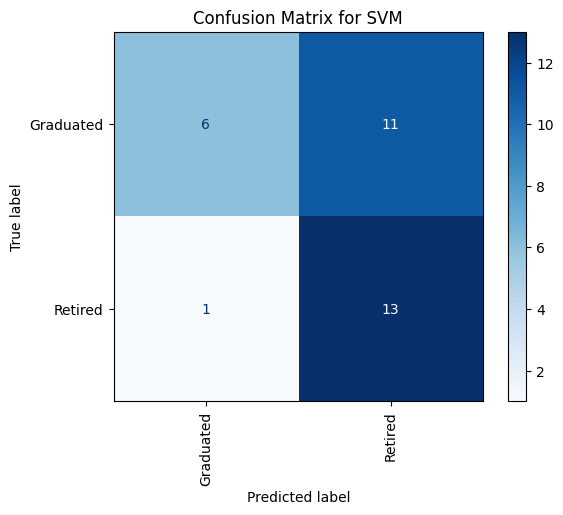


Training Decision Tree...
Test Classification Report for Decision Tree:
               precision    recall  f1-score   support

   Graduated       0.74      0.82      0.78        17
     Retired       0.75      0.64      0.69        14

    accuracy                           0.74        31
   macro avg       0.74      0.73      0.74        31
weighted avg       0.74      0.74      0.74        31



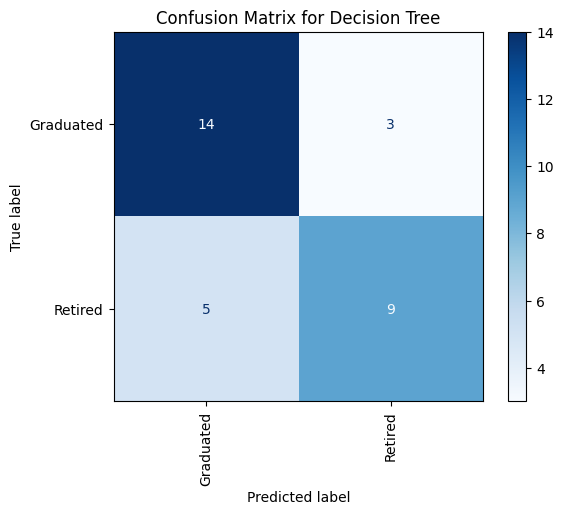


Training Random Forest...
Test Classification Report for Random Forest:
               precision    recall  f1-score   support

   Graduated       0.70      0.82      0.76        17
     Retired       0.73      0.57      0.64        14

    accuracy                           0.71        31
   macro avg       0.71      0.70      0.70        31
weighted avg       0.71      0.71      0.70        31



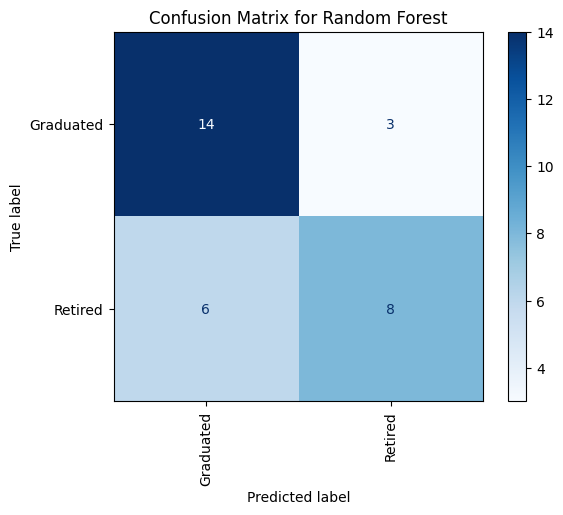


Training k-NN...
Test Classification Report for k-NN:
               precision    recall  f1-score   support

   Graduated       0.67      0.71      0.69        17
     Retired       0.62      0.57      0.59        14

    accuracy                           0.65        31
   macro avg       0.64      0.64      0.64        31
weighted avg       0.64      0.65      0.64        31



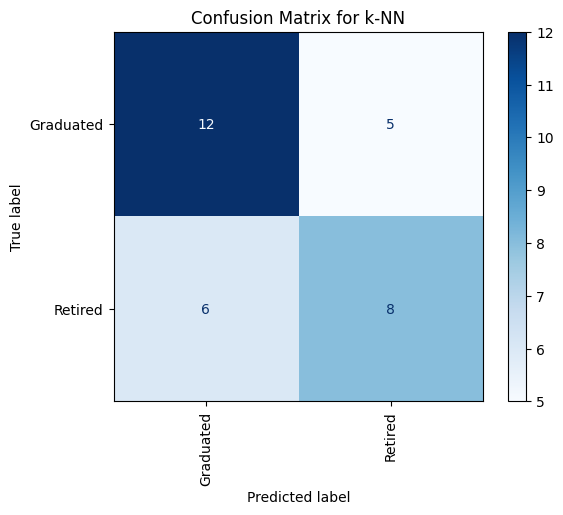


Training Naive Bayes...
Test Classification Report for Naive Bayes:
               precision    recall  f1-score   support

   Graduated       1.00      0.06      0.11        17
     Retired       0.47      1.00      0.64        14

    accuracy                           0.48        31
   macro avg       0.73      0.53      0.37        31
weighted avg       0.76      0.48      0.35        31



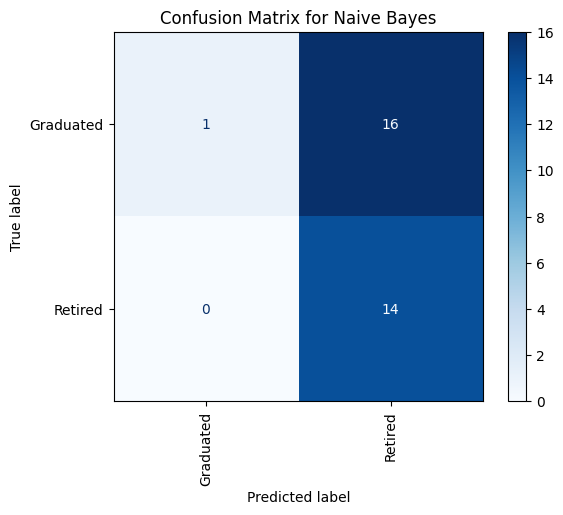

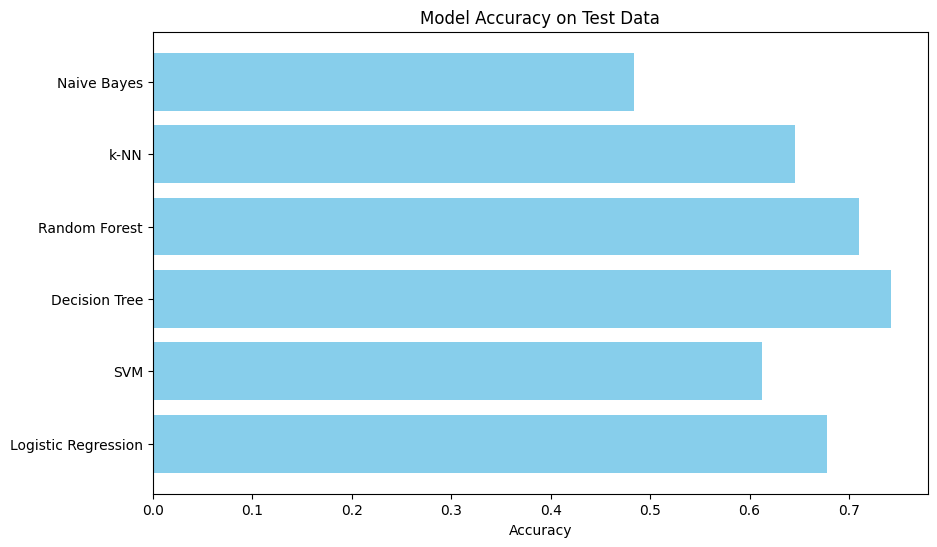

In [8]:
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)
pd.options.mode.chained_assignment = None  # Suppress warnings

# Function to compute trends for each numerical feature
def extract_features(df):
    numerical_features = ["commits", "authors", "committers", "minor_contributors", "major_contributors"]

    feature_dict = {}
    for feature in numerical_features:
        values = df[["measurement_month", feature]].dropna()

        # Linear trend (slope)
        if len(values) > 1:
            slope, _ = np.polyfit(values["measurement_month"], values[feature], 1)
        else:
            slope = 0  # Default to 0 if insufficient data
        feature_dict[f"{feature}_linear_trend"] = slope

        # Exponential trend (fit log(x))
        if len(values) > 1 and np.all(values[feature] > 0):
            log_values = np.log(values[feature])
            slope_exp, _ = np.polyfit(values["measurement_month"], log_values, 1)
            feature_dict[f"{feature}_exp_trend"] = slope_exp
        else:
            feature_dict[f"{feature}_exp_trend"] = 0

        # Polynomial trend (degree 2)
        if len(values) > 1:
            coeffs = np.polyfit(values["measurement_month"], values[feature], 2)
            feature_dict[f"{feature}_poly_trend"] = coeffs[0]  # Quadratic coefficient
        else:
            feature_dict[f"{feature}_poly_trend"] = 0

    return feature_dict


# Extract features for all projects
feature_list = []
for project, df in cleaned_data.items():
    features = extract_features(df)
    features["project"] = project
    feature_list.append(features)

features_df = pd.DataFrame(feature_list)

# Merge with status data
data = features_df.merge(status_data, on="project").drop(columns=["project"])

# Define categorical and numerical features
numerical_features = [col for col in data.columns if col not in ["status"]]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
])

# Train-validation-test split
train_data, test_data = train_test_split(
    data, test_size=0.2, stratify=data["status"], random_state=42, shuffle=True)
train_data, val_data = train_test_split(
    train_data, test_size=0.125, stratify=train_data["status"], random_state=42, shuffle=True)
# 0.125 of 80% = 10% of original data used for validation

X_train, y_train = train_data.drop(columns=["status"]), train_data["status"]
X_val, y_val = val_data.drop(columns=["status"]), val_data["status"]
X_test, y_test = test_data.drop(columns=["status"]), test_data["status"]

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegressionCV(
        cv=5,
        max_iter=1000,
        random_state=42,
        n_jobs=-1,
        penalty='l2',
        solver='saga',
        scoring='accuracy',
        refit=True
    ),
    "SVM": SVC(
        kernel='linear',        # Linear kernel for simplicity
        random_state=42,
        max_iter=1000
    ),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42,
        max_depth=5,            # Limit depth to avoid overfitting
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ),
    "k-NN": KNeighborsClassifier(
        n_neighbors=5,
        n_jobs=-1
    ),
    "Naive Bayes": GaussianNB()
}

# Store accuracy results
model_accuracies = {}

# Train, evaluate, and display results for each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Create pipeline for each model
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Test evaluation
    y_test_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    model_accuracies[model_name] = accuracy

    print(f"Test Classification Report for {model_name}:\n", classification_report(
        y_test, y_test_pred))

    # Confusion matrix
    display = ConfusionMatrixDisplay.from_estimator(
        pipeline, X_test, y_test, cmap='Blues', xticks_rotation='vertical')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Plot the accuracies for each model
plt.figure(figsize=(10, 6))
plt.barh(list(model_accuracies.keys()), list(
    model_accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy on Test Data')
plt.show()
